In [1]:
from sklearn import tree
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, \
    roc_curve
import matplotlib.pyplot as plt


In [2]:
# 加载数据集
def loadDataSet():
    iris_dataset = load_iris()
    X = iris_dataset.data
    y = iris_dataset.target
    # 将数据划分为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test


In [3]:
# 训练决策树模型
def trainDT(x_train, y_train):
    # DT生成和训练
    clf = tree.DecisionTreeClassifier(criterion="entropy")
    clf.fit(x_train, y_train)
    return clf

In [4]:
# 训练Logistic模型
def trainLS(x_train, y_train):
    # Logistic生成和训练
    clf = LogisticRegression()
    clf.fit(x_train, y_train)
    return clf

In [5]:
# 训练SVM模型
def trainSVM(x_train, y_train):
    # SVM生成和训练
    clf = svm.SVC(kernel='rbf', probability=True)
    clf.fit(x_train, y_train)
    return clf

In [6]:
def drawROC(y_one_hot, y_pre_pro):
    # AUC值
    auc = roc_auc_score(y_one_hot, y_pre_pro, average='micro')
    # 绘制ROC曲线
    fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(), y_pre_pro.ravel())
    plt.plot(fpr, tpr, linewidth=2, label='AUC=%.3f' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1.1, 0, 1.1])
    plt.xlabel('False Postivie Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [7]:
# 测试模型
def test(model, x_test, y_test):
    # 将标签转换为one-hot形式
    y_one_hot = label_binarize(y_test, np.arange(3))
    # 预测结果
    y_pre = model.predict(x_test)
    # 预测结果的概率
    y_pre_pro = model.predict_proba(x_test)

    # 混淆矩阵
    con_matrix = confusion_matrix(y_test, y_pre)
    print('confusion_matrix:\n', con_matrix)
    print('accuracy:{}'.format(accuracy_score(y_test, y_pre)))
    print('precision:{}'.format(precision_score(y_test, y_pre, average='micro')))
    print('recall:{}'.format(recall_score(y_test, y_pre, average='micro')))
    print('f1-score:{}'.format(f1_score(y_test, y_pre, average='micro')))

    # 绘制ROC曲线
    drawROC(y_one_hot, y_pre_pro)

d:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


confusion_matrix:
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]
accuracy:0.9666666666666667
precision:0.9666666666666667
recall:0.9666666666666667
f1-score:0.9666666666666667


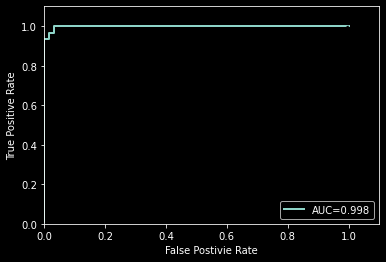

---------------------------------------------------------
confusion_matrix:
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  1  9]]
accuracy:0.9333333333333333
precision:0.9333333333333333
recall:0.9333333333333333
f1-score:0.9333333333333333


d:\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


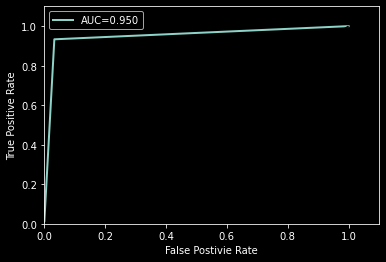

---------------------------------------------------------
confusion_matrix:
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]
accuracy:0.9666666666666667
precision:0.9666666666666667
recall:0.9666666666666667
f1-score:0.9666666666666667


d:\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


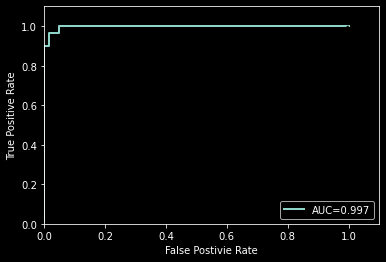

In [8]:
if __name__ == '__main__':
    X_train, X_test, y_train, y_test = loadDataSet()
    # 训练Logistic模型
    model = trainLS(X_train, y_train)
    test(model, X_test, y_test)
    print("---------------------------------------------------------")
    # 训练决策树模型
    model = trainDT(X_train, y_train)
    test(model, X_test, y_test)
    print("---------------------------------------------------------")
    # 训练SVM模型
    model = trainSVM(X_train, y_train)
    test(model, X_test, y_test)